# Compare supervised learning algorithms

## About the data

In this project, several supervised algorithms are used to accurately model individuals' income using data collected from the 1994 U.S. Census. Target is to choose the best candidate algorithm from preliminary results and further optimize this algorithm to best model the data. The goal with this implementation is to construct a model that accurately predicts whether an individual makes more than $50,000. This sort of task can arise in a non-profit setting, where organizations survive on donations.  Understanding an individual's income can help a non-profit better understand how large of a donation to request, or whether or not they should reach out to begin with.  While it can be difficult to determine an individual's general income bracket directly from public sources, we can (as we will see) infer this value from other publically available features. 

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Census+Income). The datset was donated by Ron Kohavi and Barry Becker, after being published in the article _"Scaling Up the Accuracy of Naive-Bayes Classifiers: A Decision-Tree Hybrid"_. The article by Ron Kohavi can be found here [online](https://www.aaai.org/Papers/KDD/1996/KDD96-033.pdf). The data we investigate here consists of small changes to the original dataset, such as removing the `'fnlwgt'` feature and records with missing or ill-formatted entries.

----
## Exploring the Data
Tthe last column from this dataset, `'income'`, will be our target label (whether an individual makes more than, or at most, $50,000 annually). All other columns are features about each individual in the census database.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualization code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Census dataset
data = pd.read_csv("data\census.csv")

# Success - Display the first record
display(data.head(n=5))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


### Exploring the Data: Number of individuals in target groups
A cursory investigation of the dataset will determine how many individuals fit into either group, and will tell us about the percentage of these individuals making more than \$50,000. We will compute the following:
- The total number of records, `'n_records'`
- The number of individuals making more than \$50,000 annually, `'n_greater_50k'`.
- The number of individuals making at most \$50,000 annually, `'n_at_most_50k'`.
- The percentage of individuals making more than \$50,000 annually, `'greater_percent'`.

In [2]:
# Total number of records
n_records = data.shape[0]

# Number of records where individual's income is more than $50,000
n_greater_50k = data[data['income'] == '>50K'].shape[0]

# Number of records where individual's income is at most $50,000
n_at_most_50k = data[data['income'] == '<=50K'].shape[0]

# Percentage of individuals whose income is more than $50,000
greater_percent = n_greater_50k / n_records * 100

# Results
print("Total number of records: {}".format(n_records))
print("Individuals making more than $50,000: {}".format(n_greater_50k))
print("Individuals making at most $50,000: {}".format(n_at_most_50k))
print("Percentage of individuals making more than $50,000: {}%".format(greater_percent))

Total number of records: 45222
Individuals making more than $50,000: 11208
Individuals making at most $50,000: 34014
Percentage of individuals making more than $50,000: 24.78439697492371%


**Featureset Exploration**

* **age**: continuous. 
* **workclass**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
* **education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 
* **education-num**: continuous. 
* **marital-status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
* **occupation**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
* **relationship**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
* **race**: Black, White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other. 
* **sex**: Female, Male. 
* **capital-gain**: continuous. 
* **capital-loss**: continuous. 
* **hours-per-week**: continuous. 
* **native-country**: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

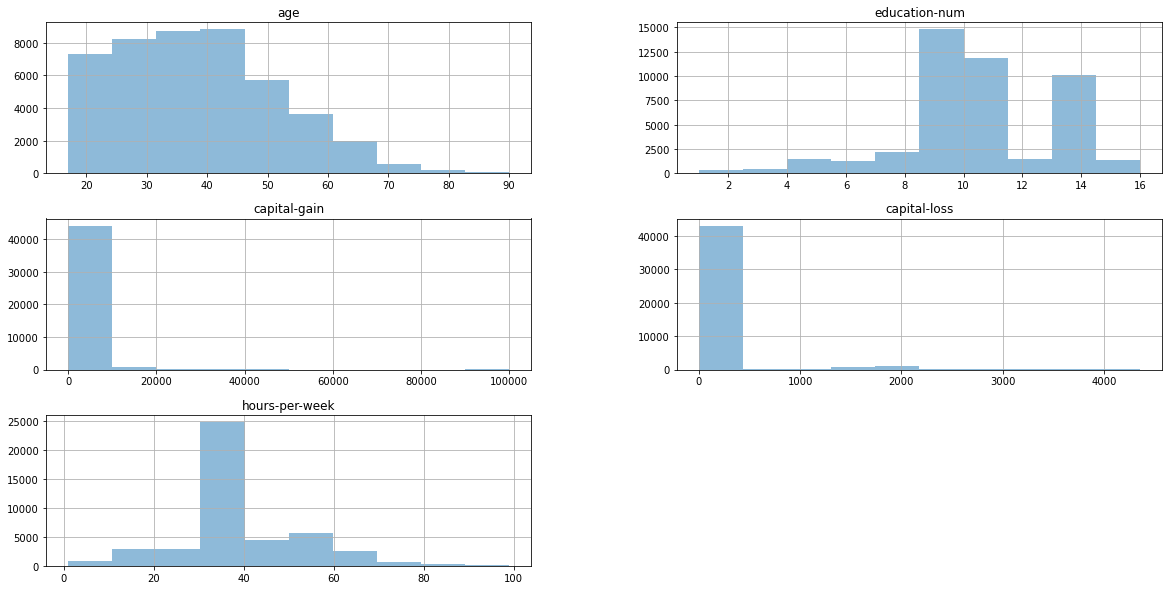

In [3]:
data.hist(alpha=0.5, figsize=(20, 10));

In [4]:
data.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000
mean,38.547941,10.118460,1101.430344,88.595418,40.938017
std,13.217870,2.552881,7506.430084,404.956092,12.007508
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [5]:
data.columns

Index(['age', 'workclass', 'education_level', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

----
## Preparing the Data
Fortunately, for this dataset, there are no invalid or missing entries, however, there are some qualities about certain features that must be adjusted.

### Transforming Skewed Continuous Features
A dataset may sometimes contain at least one feature whose values tend to lie near a single number, but will also have a non-trivial number of vastly larger or smaller values than that single number.  Algorithms can be sensitive to such distributions of values and can underperform if the range is not properly normalized. With the census dataset two features fit this description: '`capital-gain'` and `'capital-loss'`. 

C:\NoneDrive\Projects\GitHub\supervised_learning\visuals.py:48: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


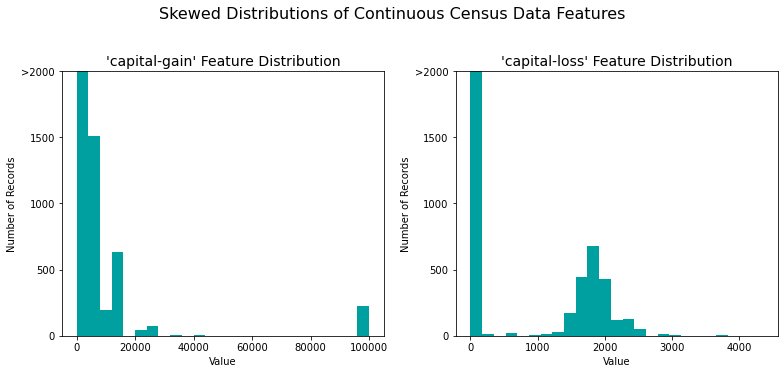

In [6]:
# Split the data into features and target label
income_raw = data['income']
features_raw = data.drop('income', axis = 1)

# Visualize skewed continuous features of original data
vs.distribution(data)

For highly-skewed feature distributions such as `'capital-gain'` and `'capital-loss'`, it is common practice to apply a <a href="https://en.wikipedia.org/wiki/Data_transformation_(statistics)">logarithmic transformation</a> on the data so that the very large and very small values do not negatively affect the performance of a learning algorithm. Using a logarithmic transformation significantly reduces the range of values caused by outliers. Care must be taken when applying this transformation however: The logarithm of `0` is undefined, so we must translate the values by a small amount above `0` to apply the the logarithm successfully.

### Value ranges and distribution of capital-gain and capital-loss

##### capital-gain: 
    - dollar per month 
    - ranges from 0 to 100.000 
    - most records have capital-gain values below 20.000
    - one group of records (~200) have capital-gains around 100.000
    - heavily right skewed distribution 
    
##### capital-loss: 
    - dollar per month 
    - ranges from 0 to 4.000
    - most records have no capital-losses
    - normal distribution around the center value of 1.800 Dollar
    - very few outliers for ~2.800 and ~3.700

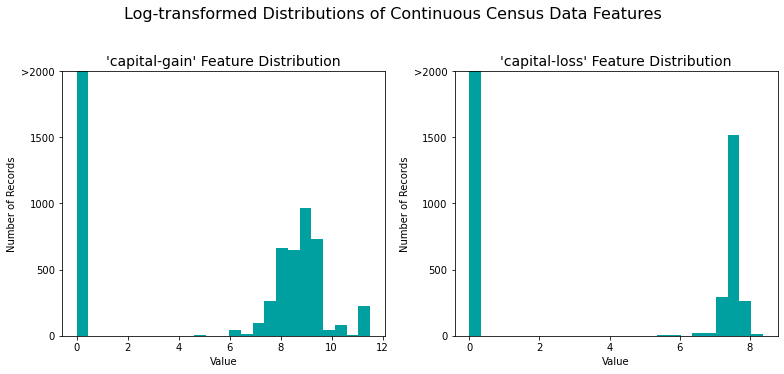

In [7]:
# Log-transform the skewed features
skewed = ['capital-gain', 'capital-loss']
features_log_transformed = pd.DataFrame(data = features_raw)
features_log_transformed[skewed] = features_raw[skewed].apply(lambda x: np.log(x + 1))

# Visualize the new log distributions
vs.distribution(features_log_transformed, transformed = True)

### Value ranges and distribution of capital-gain and capital-loss

##### capital-gain: 
    - dollar per month 
    - ranges from 0 to 12 
    - most records have capital-gain values around 0
    - slightly left skewed distribution around center value of 9
    - outlier group (~200 records) for value 11
    
##### capital-loss: 
    - dollar per month 
    - ranges from 0 to 9
    - most records have no capital-losses
    - normal distribution around the center value of 7.5

### Normalizing Numerical Features
In addition to performing transformations on features that are highly skewed, it is often good practice to perform some type of scaling on numerical features. Applying a scaling to the data does not change the shape of each feature's distribution (such as `'capital-gain'` or `'capital-loss'` above); however, normalization ensures that each feature is treated equally when applying supervised learners. Note that once scaling is applied, observing the data in its raw form will no longer have the same original meaning, as exampled below.

In [8]:
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
features_log_minmax_transform[numerical] = scaler.fit_transform(features_log_transformed[numerical])

# Show an example of a record with scaling applied
display(features_log_minmax_transform.head(n = 5))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.301370,State-gov,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.667492,0.0,0.397959,United-States
1,0.452055,Self-emp-not-inc,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.122449,United-States
2,0.287671,Private,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,0.397959,United-States
3,0.493151,Private,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,0.397959,United-States
4,0.150685,Private,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,0.397959,Cuba


In [9]:
features_log_minmax_transform.head(5)

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.301370,State-gov,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.667492,0.0,0.397959,United-States
1,0.452055,Self-emp-not-inc,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.122449,United-States
2,0.287671,Private,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,0.397959,United-States
3,0.493151,Private,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,0.397959,United-States
4,0.150685,Private,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,0.397959,Cuba


### Data Preprocessing: Transform Non-numeric Values into Numerics

In our data there are several features for each record that are non-numeric. We need to convert these non-numeric features (called *categorical variables*) into numeric values. Categorical variables we arey using the **one-hot encoding** scheme. One-hot encoding creates a _"dummy"_ variable for each possible category of each non-numeric feature. For example, assume `someFeature` has three possible entries: `A`, `B`, or `C`. We then encode this feature into `someFeature_A`, `someFeature_B` and `someFeature_C`.

|   | someFeature |                    | someFeature_A | someFeature_B | someFeature_C |
| :-: | :-: |                            | :-: | :-: | :-: |
| 0 |  B  |  | 0 | 1 | 0 |
| 1 |  C  | ----> one-hot encode ----> | 0 | 0 | 1 |
| 2 |  A  |  | 1 | 0 | 0 |

Additionally, as with the non-numeric features, we need to convert the non-numeric target label, `'income'` to numerical values for the learning algorithm to work. Since there are only two possible categories for this label ("<=50K" and ">50K"), we can avoid using one-hot encoding and simply encode these two categories as `0` and `1`, respectively. 

In [10]:
# One-hot encode the 'features_log_minmax_transform' data
features_final = pd.get_dummies(features_log_minmax_transform)
features_final.columns

Index(['age', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'workclass_ Federal-gov', 'workclass_ Local-gov',
       'workclass_ Private', 'workclass_ Self-emp-inc',
       'workclass_ Self-emp-not-inc',
       ...
       'native-country_ Portugal', 'native-country_ Puerto-Rico',
       'native-country_ Scotland', 'native-country_ South',
       'native-country_ Taiwan', 'native-country_ Thailand',
       'native-country_ Trinadad&Tobago', 'native-country_ United-States',
       'native-country_ Vietnam', 'native-country_ Yugoslavia'],
      dtype='object', length=103)

In [11]:
# Encode the 'income_raw' data to numerical values
def convert_income(income_as_str):
     return 0 if income_as_str == '<=50K' else 1
income = income_raw.apply(lambda x: convert_income(x))
income = income.astype(int)

In [12]:
# Print the number of features after one-hot encoding
encoded = list(features_final.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))

# See the encoded feature names
# print (encoded)

103 total features after one-hot encoding.


### Shuffle and Split Data
Now all _categorical variables_ have been converted into numerical features, and all numerical features have been normalized. For training the models we will now split the data (both features and their labels) into training and test sets. 80% of the data will be used for training and 20% for testing.

In [13]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_final, 
                                                    income, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 36177 samples.
Testing set has 9045 samples.


----
## Evaluating Model Performance
In this section, we will investigate four different algorithms, and determine which is best at modeling the data. Three of these algorithms will be supervised learners of our choice, and the fourth algorithm is used as a *naive predictor*.

In [14]:
all = data.shape[0]
print('all: ', all)
TP = np.sum(income) # Counting the ones as this is the naive case. 
print('TP: ', TP)
FP = income.count() - TP # Specific to the naive case

TN = 0 # No predicted negatives in the naive case
FN = 0 # No predicted negatives in the naive case

# Calculate accuracy, precision and recall
accuracy = (TP + TN) / all
print('Accuracy: ', accuracy)

rec = recall = TP / TP + FN
print(f'Recall: {recall} (since we always guess 1 we do not miss any relevant data)')

prec = precision = TP / (TP + FP)
print('Precision: ', precision)

# Calculate F-score using the formula above for beta = 0.5 and correct values for precision and recall.
beta = 0.5
fscore = (1+beta**2)* (prec*rec) / (((beta**2)*prec)+rec)

# Print the results 
print("Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore))

all:  45222
TP:  11208
Accuracy:  0.2478439697492371
Recall: 1.0 (since we always guess 1 we do not miss any relevant data)
Precision:  0.2478439697492371
Naive Predictor: [Accuracy score: 0.2478, F-score: 0.2917]


##  Compare Supervised Learning Models
**The following are some of the supervised learning models that are currently available in** [`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html) **that we take in consideration:**
- Gaussian Naive Bayes (GaussianNB)
- Decision Trees
- Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting)
- K-Nearest Neighbors (KNeighbors)
- Stochastic Gradient Descent Classifier (SGDC)
- Support Vector Machines (SVM)
- Logistic Regression

### Model Selection
List three of the supervised learning models above that are appropriate for this problem that you will test on the census data. For each model chosen we describe:

- one real-world application in industry where the model can be applied. 
- what are the strengths of the model; when does it perform well?
- what are the weaknesses of the model; when does it perform poorly?
- what makes this model a good candidate for the problem, given what you know about the data?

#### Comparison of models
| Method | Main Idea | Real World Example | Strenghts | Weaknesses |
| :----- | :-------- | :----------------- | :-------- | :--------- |
| **Logistic Regression** | This classification algorithm is using a linear equation for prediction and than uses a logistic function to map the predicted values to a probality value between 0 and 1.| \- credit scoring<br>\- evaluating medical tests<br>(solves linear issues) | \- simple to use<br>\- fast for small datasets | \- only for linear solveable issues<br>\- overfitting if more features than datapoints |
| **Gaussian Naive Bayes** | This classification algorithm uses the Bayes Rule calculating a probability of an event A given B if we have the probability of A in general (given nothing) and the probability of event B given A as well as the probability of event B in general. So for each feature /event) we have a occurance probability and based on this we can calulate the combined probability that our data point belongs to a certain class. | \- spam detection<br>\- text classification | \- easy and fast<br>\- good for small datasets with a lot of features | \- high bias \(overfitting\)<br>\- low variance \(not adapting well to test data\)<br>\- need for independent variables<br>\- better for categorical than numerical input |
| **Decision Trees** | The tree is constructed by adding nodes. At each node the features are iterated and the one is picked which splits the data best. Splitting groups so, the the information gain in maximized. Calculate the entropy of the complete set, subtract the average of the entropies of the constructed subsets and you get the information gain.| bying a car<br>(solves non-linear complicated distributed data) | \- easy to understand\.<br>\- little effort in data preparation\.<br>\- non\-linear parameters do not affect performance\. | \- massive overfitting if number of features increases or in case of noise in the data\.<br>\- models can become unstable due to variations in data\. |
| **Random Forrest** (Ensemble Method) | This algorithm takes randomly choosen subsets of features and build decision trees. If a new data point is to be classified the forrest gives a majority vote of all its trees. | \- debt repayment<br>\- identify correct combinations of medications | \- easy to understand<br>\- less probable to overfit than decision trees<br>\- fast to train | \- slow if number of trees increases<br>\- slow in predicting<br>\- tradeoff for accuracy and performance |
| **Bagging** (Ensemble Method) | In the first step we do not take the complete set of data points but smaller subsets and divide them into two groups using one-node decision trees. This is called a weak learner. I a second step we apply all weak learners to the complete data set and for each data point we take the majority vote of the weak learners. | |  |  |
| **AdaBoost** (Ensemble Method) | AdaBoost creates iteratively a number of small decision trees (weak learner) which divides the complete set of data into two areas. Each weak learner is evaluated by counting classified and misclassified points. Misclassified datapoints are punished by assigning higher weights to it. The next weak learner is created based on the weights of the previous learner. In that way the number of misclassified points are minimized. | \- cancer detection \(detecting small numbers\) | \- useful in case of unbalanced class distribution | \- sensitive to outliers<br>\- not scaleable |
| **XGBoost** (Ensemble Method) | Gradient boosting uses decision trees with underlying regression functions. These functions are optimized using gradient descent of a loss function. | \-Kaggle winner :) | \-very fast <br>\- don't overfit most times <br>\-good finetuning | \-lot of hyperparameters |
| **Support Vector Method** | If linear separation of data points is not possible in a given dimension we add a new dimension in the hope to make the data separable. |\- gene classification \(handling huge feature sets\) | \- high accuracy<br>\- fast<br>\- can handle lot of features \(features no \> datapoints no\) | \- very slow for large datasets<br>\- can not handle overlapping target classes \(requires clear separation\) |
| **K-Nearest Neighbors** (KNeighbors) | This algorithm puts a point to be predicted into its neighborhood of other points. Th k nearest neighbors give a vote, which category the newly placed point should be. | \- recommendation systems<br>\- detecting outliers \(credit card frauds\) | \- easy to use\, no additional paramters\, no additional assumptions | \- does not work so well with large datasets \(high sample size\) and in with many features \(high dimensions\) |

#### Decision Criteria Summary
| Method | Separability | Distribution | Independence | Dataset | Features | Usability | Overfitting |
| :----- | ------------ | - | - |------- | -------- | --------- | ----------- |
| **Logistic Regression** | **linear** | balanced | dependent | small | few | easy | fragile |
| **Gaussian Naive Bayes** | non-linear | balanced | **independent** | small | **many** | easy | fragile |
| **Decision Trees** | non-linear | balanced | dependent | small | few | easy | fragile |
| **Random Forrest** (Ensemble Method) | non-linear | balanced | dependent | small | few | easy | **robust** |
| **Bagging** (Ensemble Method) | non-linear | balanced |  dependent | small | few | easy | fragile |
| **AdaBoost** (Ensemble Method) | non-linear | **unbalanaced**|  dependent | **large** | few | easy | fragile |
| **Support Vector Method** | non-linear | balanced | dependent | small | **many** | easy | fragile |
| **K-Nearest Neighbors** (KNeighbors) | non-linear | balanced | dependent | small | few | easy | fragile |

#### Data Characteristics for Current Project
| Separability | Distribution | Independence | Dataset | Features |
|:-|:-|:-|:-|:-|
| non-linear | slightly unbalanced (25/75) |  dependent | small (45222 records) | small (103 total features) |

- Separability: this is just an assumption, TODO: display data as scatter plots (each feature versus income), if we assume the data are non-linear separable thant Logistic Regression is out of the game
- Distribution: not really unbalanced like for the cancer detection (AdaBoost), but also not balanced -> here we could consider any model
- Independence: the features seems not to be independent, this is just an assumption, since workclass, eductaion-level and occupation can not be independent
- Dataset size: not that big, but I have nonexperience with this
- Features size: not that many, but I have no experience

#### Shortlisted Models
| Method | Separability | Distribution | Independence | Dataset | Features |
|:-|:-|:-|:-|:-|:-|
|Random Forrest| non-linear | balanced |  dependent | small | few | 
|AdaBoost|non-linear | unbalanced |  dependent | large | few | 
|Support Vector Method|non-linear | balanced |  dependent | small | many | 

#### Sources investigated
| Method | Source |
| :----- | :----- |
| **Logistic Regression** | https://towardsdatascience.com/quick-and-easy-explanation-of-logistics-regression-709df5cc3f1e |
| **Gaussian Naive Bayes** | https://towardsdatascience.com/all-about-naive-bayes-8e13cef044cf |
| **Decision Trees** | https://towardsdatascience.com/decision-tree-ba64f977f7c3 |
| **Random Forrest** (Ensemble Method) | https://builtin.com/data-science/random-forest-algorithm<br>https://towardsdatascience.com/an-implementation-and-explanation-of-the-random-forest-in-python-77bf308a9b76 |
| **Bagging** (Ensemble Method) |  |
| **AdaBoost** (Ensemble Method) | https://hackernoon.com/under-the-hood-of-adaboost-8eb499d78eab<br>https://corporatefinanceinstitute.com/resources/knowledge/other/boosting/ |
| **Support Vector Method** |  |
| **K-Nearest Neighbors** (KNeighbors) | https://medium.com/@alex.ortner.1982/top-10-binary-classification-algorithms-a-beginners-guide-feeacbd7a3e2<br>https://towardsdatascience.com/tagged/real-world-examples-knn |
| General | https://towardsdatascience.com/part-i-choosing-a-machine-learning-model-9821eecdc4ce |

### Training and Predicting Pipeline

In [15]:
from sklearn.metrics import accuracy_score, fbeta_score

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # Fit the learner to the training data using slicing with 'sample_size' 
    start = time() # Get start time
    learner = learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time() # Get end time
    
    # Calculate the training time
    results['train_time'] = end - start
        
    # Get the predictions on the test set(X_test),
    # then get predictions on the first 300 training samples(X_train) using .predict()
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time() # Get end time
    
    # Calculate the total prediction time
    results['pred_time'] = end - start
    print('-----> prediction time: ',  results['pred_time'])
            
    # Compute accuracy on the first 300 training samples which is y_train[:300]
    results['acc_train'] = accuracy_score(y_train[:300], predictions_train[:300])
    #     print('-----> accuracy train: ',  results['acc_train'])
        
    # Compute accuracy on test set using accuracy_score()
    #     results['acc_test'] = accuracy_score(y_test[:300], predictions_test[:300])
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    print('-----> accuracy test: ',  results['acc_test'])
    
    # Compute F-score on the the first 300 training samples using fbeta_score()
    results['f_train'] = fbeta_score(y_train[:300], predictions_train[:300], beta=0.5)
    #     print('-----> fscore train: ',  results['f_train'])
        
    # Compute F-score on the test set which is y_test
    results['f_test'] = fbeta_score(y_test[:300], predictions_test[:300], beta=0.5)
    print('-----> fscore test: ',  results['f_test'])
       
    # Success
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    # Return the results
    return results

### Initial Model Evaluation

-----> prediction time:  0.09199976921081543
-----> accuracy test:  0.8151464897733555
-----> fscore test:  0.5925925925925926
RandomForestClassifier trained on 361 samples.
-----> prediction time:  0.14300107955932617
-----> accuracy test:  0.8354892205638474
-----> fscore test:  0.6118881118881119
RandomForestClassifier trained on 3617 samples.
-----> prediction time:  0.2070004940032959
-----> accuracy test:  0.8423438363736871
-----> fscore test:  0.6748466257668713
RandomForestClassifier trained on 36177 samples.
-----> prediction time:  0.15499639511108398
-----> accuracy test:  0.8206744057490326
-----> fscore test:  0.48013245033112584
AdaBoostClassifier trained on 361 samples.
-----> prediction time:  0.15400004386901855
-----> accuracy test:  0.849861802100608
-----> fscore test:  0.587248322147651
AdaBoostClassifier trained on 3617 samples.
-----> prediction time:  0.14800143241882324
-----> accuracy test:  0.8576008844665561
-----> fscore test:  0.6766917293233082
AdaBoostC

C:\NoneDrive\Projects\GitHub\supervised_learning\visuals.py:119: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  pl.tight_layout(h_pad=0.1, w_pad=0.1)


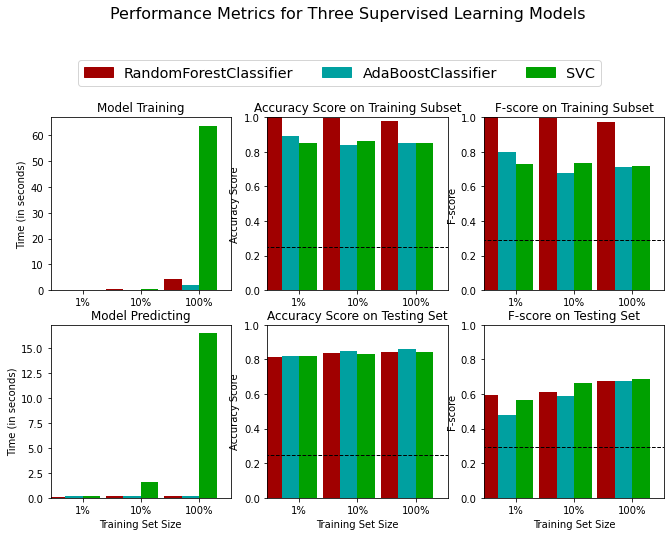

In [16]:
### Shortlist Learning Models
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# Initialize the models
clf_A = RandomForestClassifier(random_state = 42)#(n_estimators=200)
clf_B = AdaBoostClassifier() #(n_estimators=300, learning_rate=0.2)
clf_C = SVC(random_state = 42)

# Calculate the number of samples for 1%, 10%, and 100% of the training data
samples_100 = X_train.shape[0]
samples_10 = int(X_train.shape[0] / 10)
samples_1 = int(X_train.shape[0] / 100)

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)
#     print(results)

# Run metrics visualization for the three supervised learning models chosen
vs.evaluate(results, accuracy, fscore)

In [ ]:
### Longlist Learning Models
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB

#Initialize the models
clf_A = GaussianNB()
clf_B = MultinomialNB() #(n_estimators=300, learning_rate=0.2)
clf_C = BaggingClassifier(random_state = 42)

# Calculate the number of samples for 1%, 10%, and 100% of the training data
samples_100 = X_train.shape[0]
samples_10 = int(X_train.shape[0] / 10)
samples_1 = int(X_train.shape[0] / 100)

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)
#     print(results)

# Run metrics visualization for the three supervised learning models chosen
vs.evaluate(results, accuracy, fscore)

----
## Improving Results
For improving results we will perform a grid search optimization for the model over the entire training set (`X_train` and `y_train`) by tuning at least one parameter to improve upon the untuned model's F-score. 

### Choosing the Best Model

Look at the F score for the testing set when 100% of the training set is used we see which model had the highest score. 

In summary we take into consideration:
* metrics - F score on the testing when 100% of the training data is used, 
* prediction/training time
* the algorithm's suitability for the data.

#### Comparison of shortlisted models
|method|metrics (fbeta score)| prediction/training time|suitability|
|-|-|-|-|
|Random Forrest|0.62091503268|0.033171892166137695| fastest but in terms of precision not as good as the best one |
|AdaBoost|**0.67669172932**|0.07823300361633301|best metrics results and reasonable fast |
|Support Vector Method|0.655172413793|23.752284049987793|almost as good as the best one but very slow |

#### Conclusion: The winner is AdaBoost
From all shortlisted learning models such as Random Forrest, AdaBoost and Support Vector Method the AdaBoost Classifier ist the best one in terms of precision and performance. Actually all three are very close to each other if only the fbeta score would be considered. The SVM classifier disqlalifies since it is to slow. Since the Random Forrest Classifier is only slightly worse, we should do the finetuning for this model as well and see whether it beats AdaBoost afterwards.


**AdaBoost** (Ensemble Method): AdaBoost creates iteratively a number of small decision trees (weak learner) which divides the data into two areas.  Each weak learner is evaluated by counting classified and misclassified points. Misclassified datapoints are punished by assigning higher weights to it. The next weak learner is created based on the weights of the previous learner. In that way the number of misclassified points are minimized.

### Model Tuning
We will now fine tune the chosen model using grid search (`GridSearchCV`) with at least one important parameter tuned with at least 3 different values. We will need to use the entire training set for this. In the code cell below, you will need to implement the following:

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import make_scorer, fbeta_score

def get_best_grid_search_estimator(clf, param_dist):
    
    scorer = make_scorer(fbeta_score, beta=0.5)
    
    grid_obj =  GridSearchCV(clf, param_dist, scoring=scorer)    
    
    grid_fit = grid_obj.fit(X_train, y_train)
    
    # Get the estimator
    return grid_fit.best_estimator_


def get_best_randomized_search_estimator(clf, param_dist):
    
    scorer = make_scorer(fbeta_score, beta=0.5)
    
    grid_obj =  RandomizedSearchCV(clf, param_dist, scoring=scorer)    
    
    grid_fit = grid_obj.fit(X_train, y_train)
    
    # Get the estimator
    return grid_fit.best_estimator_


def get_best_predictions(clf, best_clf):
    # Make predictions using the unoptimized and the optimized model
    start = time()
    predictions = (clf.fit(X_train, y_train)).predict(X_test)
    end = time()
    
    start = time()
    best_predictions = best_clf.predict(X_test)
    end = time()
    print('-----> best prediction time: ',  end - start)

    # Report the before-and-afterscores
    print("Unoptimized model\n------")
    print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
    print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
    print("\nOptimized Model\n------")
    print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
    print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))
    return best_predictions

### Test AdaBoostClassifier

In [ ]:
clf = AdaBoostClassifier()

param_dist = {"n_estimators": [10, 100, 200, 400],
              "learning_rate": [0.5, 1, 2, 10, 20]}

##### Use grid search to find the best predictor

In [ ]:
best_clf = get_best_grid_search_estimator(clf, param_dist)
best_predictions = get_best_predictions(clf, best_clf)

##### Use randomized search to find the best predictor

In [ ]:
best_random_clf = get_best_randomized_search_estimator(clf, param_dist)
randomized_best_predictions = get_best_predictions(clf, best_random_clf)

### Test RandomForrestClassifier

In [ ]:
clf_forrest = RandomForestClassifier(random_state = 42)

param_dist = {"max_depth": [2,4,10],
              "n_estimators": [100, 200, 400],
#               "max_features": list(range(1, X_train.shape[1]+1)),
              "min_samples_split": [2, 11],
              "min_samples_leaf": [1, 11]}


best_clf_forrest = get_best_grid_search_estimator(clf_forrest, param_dist)
forrest_best_predictions = get_best_predictions(clf, best_clf_forrest)

### Final Model Evaluation

* Now we compare the optimized and the unoptimized models in respect to accuracy and F-score on the testing data. 

#### Results for AdaBoostClassifier:

|     Metric     | Naive Predictor  | Unoptimized Model | Optimized Model |
| :------------: | :--------------: | :---------------: | :-------------: |
| Accuracy Score | 0.2478           | 0.8576            | 0.8652          |
| F-score        | 0.2917           | 0.7246            | 0.7401          |


**Final Model Evaluation:** The AdaBoost Classifier got much better accuracy scores and f-scores than the naive predictor. The difference between th unoptimized and the optimized model is not really significant. The accuracy improved by around 1% the f-score around 1,5%. 

----
## Feature Importance

An important task when performing supervised learning on a dataset like the census data we study here is determining which features provide the most predictive power. By focusing on the relationship between only a few crucial features and the target label we simplify our understanding of the phenomenon, which is most always a useful thing to do. In the case of this project, that means we wish to identify a small number of features that most strongly predict whether an individual makes at most or more than \$50,000.

### Feature Relevance Observation
When **Exploring the Data**, it was shown there are thirteen available features for each individual on record in the census data. Of these thirteen records, we try to find which five features being most important for prediction, and in what order they could be ranked?

**Feature Relevance per Intuition:**

- education: higher income should be correlated to higher education
- occupation: income differs significantly depending on the industrial sector
- hours-per-week: part time work minimizes the income and is impeding carrers
- sex: women are paid less than men
- age: the more experienced the more income

#### Investigate the Intuition
Just counting the records per feature value can give us a better feeling whether the feature might be relevant for the classification or not. If we observe the same kind of distribution in both groups (<=50k and > 50k) than the feature is likely not being relevant. If we observe certain feature values being only in one group than we found the feature at least partly relevant for the classification.

In [ ]:
data.education_level.unique()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sorter=[' Preschool', ' 1st-4th', ' 5th-6th', ' 7th-8th', ' 9th', ' 10th', ' 11th', ' 12th', ' Some-college', ' Prof-school', ' HS-grad', ' Assoc-acdm', ' Assoc-voc', ' Bachelors', ' Masters', ' Doctorate']
data_sorted_per_education = data.copy()
data_sorted_per_education.education_level = data_sorted_per_education.education_level.astype("category")
data_sorted_per_education.education_level.cat.set_categories(sorter, inplace=True)

sns.countplot(x='income',hue='education_level',data=data_sorted_per_education);
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

**Observations:** As expected nearly all school drop outs are in the first group, while nearly all doctorates are in the second group. 

In [ ]:
sns.countplot(x='income',hue='occupation',data=data);
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

In [ ]:
sns.countplot(x='income',hue='sex',data=data);
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

In [ ]:
sns.countplot(x='income',hue='age',data=data);
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

**Observed Feature Relevance:**

I searched for a simple way to explore the correlation between the features and the target. I found this article describing a way to display a correlation matrix which also considers categorical variables: https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9.
The outcome surprised me.

<img src="images\correlation_matrix.png">

**Summary of Observed Feature correlated to the target:**

- marital status / relationship (0.45): according to the correlation matrix these are the best predictors for income
- education level: fits my expectations
- occupation: fits my expectations
- education number: fits my expectations
- age : fits my expectations
- hours per week: I thought this would be more important

In [ ]:
sns.countplot(x='income',hue='marital-status',data=data);
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

In [ ]:
sns.countplot(x='income',hue='relationship',data=data);
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

### Extracting Feature Importance

In [ ]:
model = AdaBoostClassifier()
model.fit(X_train, y_train)

# Extract the feature importances 
importances = model.feature_importances_

# Plot
vs.feature_plot(importances, X_train, y_train)

#### Observation

**Extracted Features compared to Observed Features:**
There is a huge gap between the observation and the extraction of features. The extracted features are somehow counter intuitive. So capital loss and gain shall have a much higher impact on the income than education. This needs to be proved. Age counts more than eductaion, this is also suprising to me.

### Feature Selection
How does a model perform if we only use a subset of all the available features in the data? With less features required to train, the expectation is that training and prediction time is much lower — at the cost of performance metrics. From the visualization above, we see that the top five most important features contribute more than half of the importance of **all** features present in the data. This hints that we can attempt to *reduce the feature space* and simplify the information required for the model to learn. The code cell below will use the same optimized model you found earlier, and train it on the same training set *with only the top five important features*. 

In [ ]:
# Import functionality for cloning a model
from sklearn.base import clone

# Reduce the feature space
X_train_reduced = X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:5]]]
X_test_reduced = X_test[X_test.columns.values[(np.argsort(importances)[::-1])[:5]]]

# Train on the "best" model found from grid search earlier
clf = (clone(best_clf)).fit(X_train_reduced, y_train)

# Make new predictions
start = time()
reduced_predictions = clf.predict(X_test_reduced)
end = time()
print('-----> reduced prediction time: ',  end - start)

# Report scores from the final model using both versions of data
print("Final Model trained on full data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))
print("\nFinal Model trained on reduced data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, reduced_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, reduced_predictions, beta = 0.5)))

### Effects of Feature Selection

* We now compare the final model's F-score and accuracy score on the reduced data using only five features to those same scores when all features are used.

#### Results:

|     Metric     | Naive Predictor  | Unoptimized Model | Optimized Model | Reduced Model   |
| :------------: | :--------------: | :---------------: | :-------------: | :-------------: |
| Accuracy Score | 0.2478           | 0.8576            | 0.8652          | 0.8417          |
| F-score        | 0.2917           | 0.7246            | 0.7401          | 0.7017          |
| Prediction Time| -                | -                 | 0.58            | 0.46            |


### Conclusion Feature Selection
We lost around 2% of accuracy and around 3% of F-score. We gained 21% in prediction time. For this size of dataset it is not worth to loose quality in order to gain performance but for larger datasets we should consider taking the reduced model. 